In [1]:
import pandas as pd
import seaborn as sns
import folium


# Abrimos los Data Ya limpios

In [3]:
data_comple=pd.read_csv("../01 - Data_tratados/Datos_Procesados.csv")
data_comple=data_comple[["Estado","latitude","longitude","category","name"]]
Population=pd.read_csv("../01 - Data_tratados/Population_limpio.csv")
Population=Population[["State","Total population","Categoría de densidad"]]
Rewiews=pd.read_csv("../01 - Data_tratados/yast.csv")
Rewiews=Rewiews[["name","text","date","state"]]

In [4]:
data_comple.dropna(subset=["category"], inplace=True)

In [5]:
data_comple.head(1)

,Estado,latitude,longitude,category,name
0,Alabama,33.381416,-86.80704,Pizza restaurant,California Pizza Kitchen at Riverchase Galleria


In [6]:
Population.head(1)

,State,Total population,Categoría de densidad
0,Alabama,5039877,Mediana


In [7]:
Rewiews.head(1)

,name,text,date,state
0,Century 20 El Con and XD,Avengers time with the ladies.,2012-05-18 02:17:21,Florida


# Elegimos la catergoria entre Mayor, Mediana y Baja Poblacion


In [8]:
popu= "Baja"
fun1=Population[Population['Categoría de densidad'] == popu]
fun1



,State,Total population,Categoría de densidad
1,Alaska,732673,Baja
7,Delaware,1003384,Baja
8,District of Columbia,670050,Baja
11,Hawaii,1441553,Baja
12,Idaho,1900923,Baja
19,Maine,1372247,Baja
26,Montana,1104271,Baja
27,Nebraska,1963692,Baja
29,New Hampshire,1388992,Baja
31,New Mexico,2115877,Baja


# Elegimos estado para buscar informacion

,index,category
0,Mexican restaurant,22
1,Chinese restaurant,21
2,Pizza restaurant,20
3,"Sandwich shop, Caterer, Fast food restaurant, ...",13
4,Seafood restaurant,11


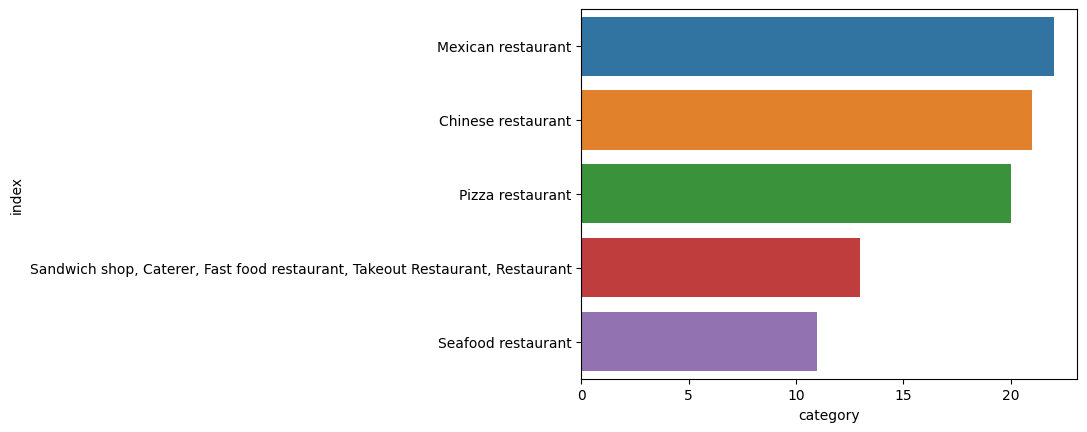

In [9]:
estado="Delaware"
df=data_comple[data_comple['Estado'] == estado]
Categorias=pd.DataFrame(df['category'].value_counts().head(5).reset_index())
sns.barplot(x='category', y='index', data=Categorias)
Categorias


In [ ]:
# Datos de ejemplo
latitudes =df["latitude"]
longitudes = df["longitude"]

# Crear el mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=5)

# Agregar marcadores al mapa
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa

In [49]:
len(list(df["name"].unique()))

1902

# Elegimos la categoria

,index,name
0,Papa John's Pizza,15
1,Zeeks Pizza,2
2,Hometown Pizza,2
3,Moxee Pizza,1
4,The Rustic Fork,1


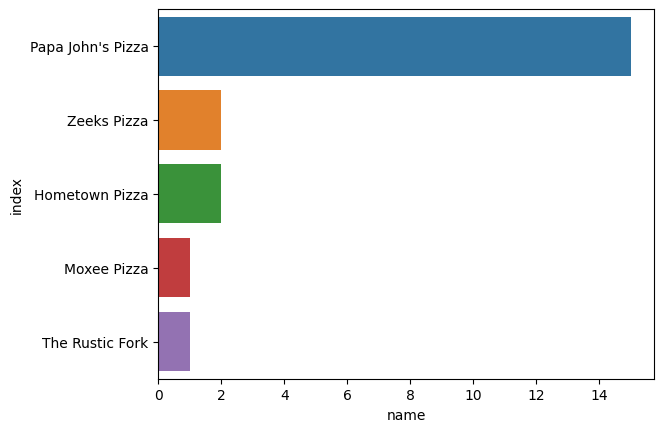

In [50]:
categori=df[df["category"] == 'Pizza restaurant']
conteo=pd.DataFrame(categori['name'].value_counts().head(5).reset_index())
sns.barplot(y='index', x='name', data=conteo)
conteo

In [ ]:
latitudes =categori["latitude"]
longitudes = categori["longitude"]

# Crear el mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=5)

# Agregar marcadores al mapa
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
import folium

# Datos de ejemplo
latitudes =categori["latitude"]
longitudes = categori["longitude"]

# Crear el mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=5)

# Agregar marcadores al mapa
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa


# Franquicias del Estados

,index,name
0,Subway,15
1,Wawa,15
2,Royal Farms,12
3,Dunkin',10
4,Papa John's Pizza,8


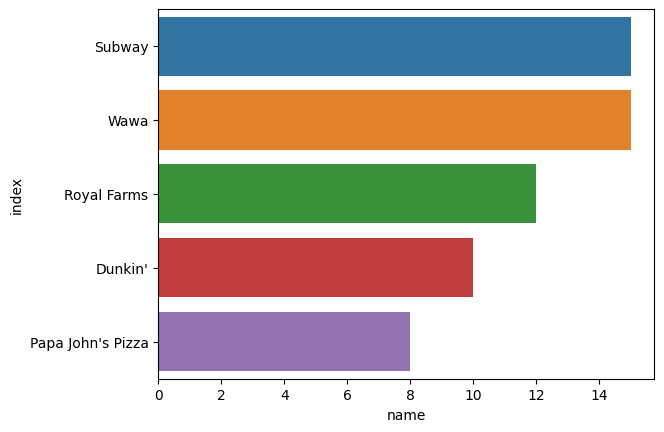

In [78]:

Franquicias=pd.DataFrame(df['name'].value_counts().head(5).reset_index())
sns.barplot(x='name', y='index', data=Franquicias)
Franquicias

In [39]:
yat=pd.read_csv("yast.csv")

In [81]:
yat

,Unnamed: 0,name,text,date,state
0,0,Century 20 El Con and XD,Avengers time with the ladies.,2012-05-18 02:17:21,Florida
1,1,Century 20 El Con and XD,The Dark Knight Rises in XD! I don't know what...,2012-07-22 02:22:54,Florida
2,2,Century 20 El Con and XD,Cleanliness matters....I just sat down to watc...,2018-04-28 17:33:05,Florida
3,3,Century 20 El Con and XD,Early bird gets the worm!,2011-10-30 19:10:34,Florida
4,4,Century 20 El Con and XD,Brand new seats!,2015-03-22 18:12:37,Florida
...,...,...,...,...,...
908910,908910,Sherwood Florist,Best florist in town!,2016-10-04 11:16:14,Indiana
908911,908911,Tuck Barre & Yoga West Philadelphia,Such great energy in this place! And the worko...,2018-09-09 17:52:49,Idaho
908912,908912,Free Appliance Removal,Fast and polite,2021-01-26 07:04:38,Pennsylvania
908913,908913,Balentine's,"Excellent food and fast, friendly service.",2016-05-13 16:37:02,Arizona


In [55]:

len(list(yat["state"].unique()))

27

In [79]:

rewiew=yat[yat['name'] == "Wawa"]

rewiew.sort_values('date', ascending=False, inplace=True)
rewiew.reset_index(drop=True, inplace=True)


result=rewiew[["text","date"]]
result.head(5)


C:\Users\victo\AppData\Local\Temp\ipykernel_10388\1183932309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rewiew.sort_values('date', ascending=False, inplace=True)


,text,date
0,Every Wawa gas I pull into the same thing... b...,2022-01-15 21:11:16
1,Great food at reasonable prices,2021-12-25 02:31:36
2,stingyyyy af w their portions,2021-12-11 00:44:34
3,Panhandlers begging outfront .. And passed o...,2021-11-20 16:30:21
4,Wawa sucks. Ordered a hoagie with ranch and go...,2021-11-07 05:43:11
